# IJO detection by AutoEncoder

## 参考
* https://www.slideshare.net/KazukiMotohashi2/20190619-150591242
* http://data-analysis-stats.jp/2020/01/03/keras-autoencoder-%E3%81%A7%E7%95%B0%E5%B8%B8%E6%A4%9C%E7%9F%A5%E3%80%8C%E8%A9%90%E6%AC%BA%E6%A4%9C%E7%9F%A5%E3%80%8D/

# 実装

In [24]:
from keras.models import Model, model_from_json
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

## データ読み込み

In [25]:
rng = np.random.RandomState(42)

n_feat = 2
# Generate train data
X = 0.3 * rng.randn(100, n_feat)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, n_feat)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, n_feat))

## モデル作成 

In [72]:
encoding_dim = 4
input_layer = Input(shape=(n_feat,))
encoded = Dense(32, activation='tanh')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(n_feat, activation='tanh')(decoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 132       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 66        
Total params: 454
Trainable params: 454
Non-trainable params: 0
_________________________________________________________________


In [73]:
nb_epoch = 600
batch_size = 32

history = autoencoder.fit(X_train, X_train,
   epochs=nb_epoch,
   batch_size=batch_size,
   validation_data=(X_test, X_test), )


Train on 200 samples, validate on 40 samples
Epoch 1/600
200/200 [==============================] - 0s 2ms/step - loss: 3.9155 - val_loss: 3.7873
Epoch 2/600
200/200 [==============================] - 0s 140us/step - loss: 3.6699 - val_loss: 3.5468
Epoch 3/600
200/200 [==============================] - 0s 145us/step - loss: 3.4415 - val_loss: 3.3138
Epoch 4/600
200/200 [==============================] - 0s 145us/step - loss: 3.2106 - val_loss: 3.0594
Epoch 5/600
200/200 [==============================] - 0s 150us/step - loss: 2.9562 - val_loss: 2.7986
Epoch 6/600
200/200 [==============================] - 0s 130us/step - loss: 2.6936 - val_loss: 2.5311
Epoch 7/600
200/200 [==============================] - 0s 140us/step - loss: 2.4224 - val_loss: 2.2587
Epoch 8/600
200/200 [==============================] - 0s 135us/step - loss: 2.1408 - val_loss: 1.9876
Epoch 9/600
200/200 [==============================] - 0s 140us/step - loss: 1.8736 - val_loss: 1.7399
Epoch 10/600
200/200 [========

200/200 [==============================] - 0s 78us/step - loss: 1.0780 - val_loss: 1.1183
Epoch 158/600
200/200 [==============================] - 0s 78us/step - loss: 1.0780 - val_loss: 1.1183
Epoch 159/600
200/200 [==============================] - 0s 156us/step - loss: 1.0780 - val_loss: 1.1183
Epoch 160/600
200/200 [==============================] - 0s 78us/step - loss: 1.0780 - val_loss: 1.1183
Epoch 161/600
200/200 [==============================] - 0s 156us/step - loss: 1.0780 - val_loss: 1.1182
Epoch 162/600
200/200 [==============================] - 0s 78us/step - loss: 1.0780 - val_loss: 1.1182
Epoch 163/600
200/200 [==============================] - 0s 78us/step - loss: 1.0780 - val_loss: 1.1182
Epoch 164/600
200/200 [==============================] - 0s 78us/step - loss: 1.0780 - val_loss: 1.1182
Epoch 165/600
200/200 [==============================] - 0s 78us/step - loss: 1.0780 - val_loss: 1.1182
Epoch 166/600
200/200 [==============================] - 0s 78us/step - loss

200/200 [==============================] - 0s 105us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 314/600
200/200 [==============================] - 0s 110us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 315/600
200/200 [==============================] - 0s 110us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 316/600
200/200 [==============================] - 0s 110us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 317/600
200/200 [==============================] - 0s 120us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 318/600
200/200 [==============================] - 0s 110us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 319/600
200/200 [==============================] - 0s 105us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 320/600
200/200 [==============================] - 0s 105us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 321/600
200/200 [==============================] - 0s 105us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 322/600
200/200 [==============================] - 0s 120us/ste

200/200 [==============================] - 0s 105us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 470/600
200/200 [==============================] - 0s 115us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 471/600
200/200 [==============================] - 0s 105us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 472/600
200/200 [==============================] - 0s 105us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 473/600
200/200 [==============================] - 0s 110us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 474/600
200/200 [==============================] - 0s 110us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 475/600
200/200 [==============================] - 0s 120us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 476/600
200/200 [==============================] - 0s 115us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 477/600
200/200 [==============================] - 0s 110us/step - loss: 1.0778 - val_loss: 1.1180
Epoch 478/600
200/200 [==============================] - 0s 100us/ste

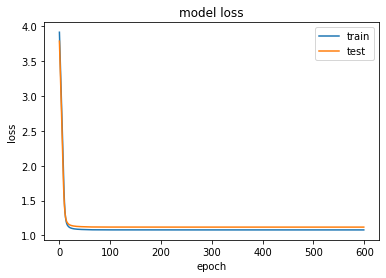

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [75]:
def mse( xx ):
    return np.mean( xx**2, axis=1 )

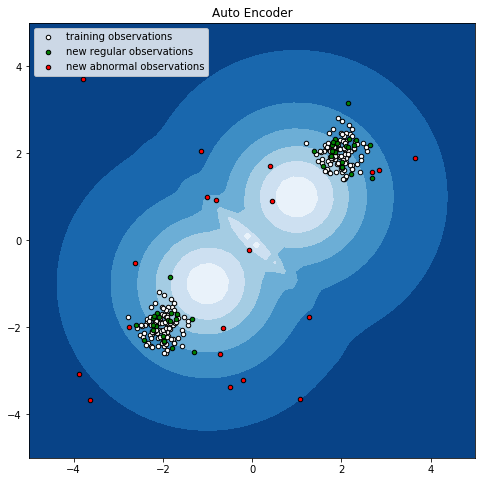

In [76]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
xxyy = np.c_[xx.ravel(), yy.ravel()]
Z = autoencoder.predict(xxyy)
Z = mse(Z - xxyy)
Z = 1 / ( 1 + Z.reshape(xx.shape) ) # 1:normal, 0:abnormal

plt.figure( figsize=[8,8])
plt.title("Auto Encoder")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")

plt.show()

In [77]:
y_pred_train = autoencoder.predict( X_train )
y_pred_test = autoencoder.predict( X_test )
y_pred_outliers = autoencoder.predict( X_outliers )

In [78]:
scr_train = 1 / ( 1 + mse( X_train - y_pred_train ) )
scr_test = 1 / ( 1 + mse( X_test - y_pred_test) )
scr_outliers = 1 / ( 1 + mse( X_outliers - y_pred_outliers ) )

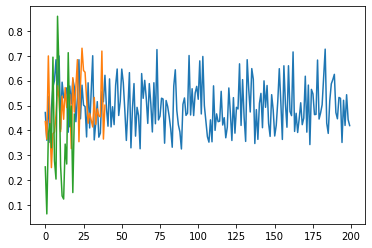

In [79]:
th =  0.4
res_train = np.ones_like( scr_train, dtype=np.int16 )
res_train[scr_train < th] = -1
res_test = np.ones_like( scr_test, dtype=np.int16 )
res_test[scr_test < th] = -1
res_outliers = np.ones_like( scr_outliers, dtype=np.int16 )
res_outliers[scr_outliers < th] = -1

plt.plot( scr_train )
plt.plot( scr_test )
plt.plot( scr_outliers )

In [80]:
from matplotlib.colors import Normalize

def plot_true_false( data, result, score, vmax=None, vmin=None ):
    res_minus = ( result < 0 )
    res_plus = ( result > 0 )

    norm=Normalize(vmin=vmin, vmax=vmax)

    plt.figure( figsize=[10,6] )
    plt.scatter( data[res_plus,0], data[res_plus,1], c=score[res_plus], s=10, norm=norm )
    plt.scatter( data[res_minus,0], data[res_minus,1], c=score[res_minus], marker='x',norm=norm )
    plt.colorbar()

In [81]:
X_all = np.concatenate( ( X_train, X_test, X_outliers ) )
scr_all = np.concatenate( ( scr_train, scr_test, scr_outliers ) )
res_all = np.concatenate( ( res_train, res_test, res_outliers ) )

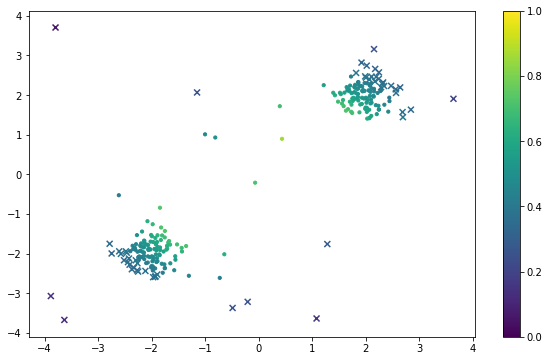

In [82]:
plot_true_false( X_all, res_all, scr_all, vmax=1.0, vmin=0.0)

In [103]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [97]:
ans_test = np.ones_like( res_test )
ans_outliers = np.ones_like( res_outliers ) *  -1
ans_eval = np.concatenate( (ans_test, ans_outliers ))
res_eval = np.concatenate( (res_test, res_outliers ))

In [111]:
confmat = confusion_matrix( y_true=ans_eval, y_pred=res_eval, labels=[-1,1] )
accuracy = accuracy_score( y_true=ans_eval, y_pred=res_eval )
precision = precision_score( y_true=ans_eval, y_pred=res_eval, pos_label=-1 )
recall = recall_score( y_true=ans_eval, y_pred=res_eval, pos_label=-1 )
f1 = f1_score( y_true=ans_eval, y_pred=res_eval, pos_label=-1 )

print( confmat )
print( accuracy)
print( precision)
print( recall )
print( f1 )

[[12  8]
 [ 8 32]]
0.7333333333333333
0.6
0.6
0.6


In [83]:
#%qtconsole